# Import libarries

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from scipy import stats
from tqdm import tqdm

# set configurations
# mu, sigma


In [3]:
mu = 5
sigma = 2

l = np.linspace(-20, 10, 100)
num_samples = 50
samples = norm.rvs(mu, sigma, size=num_samples)
mu_hat, sigma_hat = norm.fit(samples)


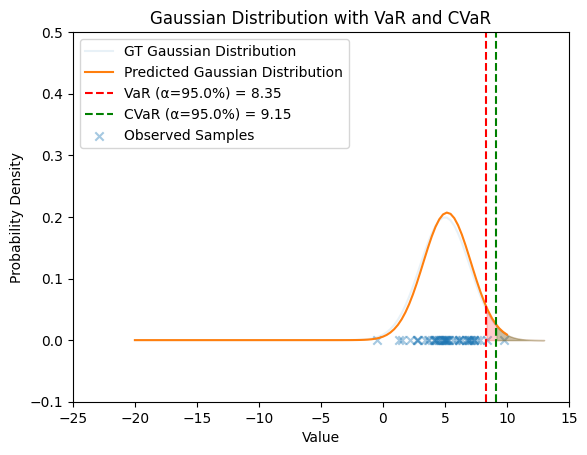

In [4]:

# plot GT distribution
# l = np.linspace(-20, 10, 100)
plt.plot(l, norm.pdf(l, mu, sigma), label='GT Gaussian Distribution', alpha=0.1)

# plot samples
# num_samples = 20
# samples = norm.rvs(mu, sigma, size=num_samples)
plt.scatter(samples,[0 for _ in range(num_samples)], marker='x', alpha=0.4, label='Observed Samples')

# plot pred distribution
# mu_hat, sigma_hat = norm.fit(samples)
# l = np.linspace(-20, 10, 100)
plt.plot(l, norm.pdf(l, mu_hat, sigma_hat), label='Predicted Gaussian Distribution')


# Parameters
alpha = 0.95  # confidence level

# VaR calculation
z_alpha = stats.norm.ppf(alpha)
VaR = mu_hat + sigma_hat * z_alpha

# CVaR calculation
pdf_z_alpha = stats.norm.pdf(z_alpha)
CVaR = mu_hat + (sigma_hat * pdf_z_alpha) / (1 - alpha)

# Plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.axvline(x=VaR, color='r', linestyle='--', label=f'VaR (α={alpha*100}%) = {VaR:.2f}')
plt.axvline(x=CVaR, color='g', linestyle='--', label=f'CVaR (α={alpha*100}%) = {CVaR:.2f}')
plt.fill_between(x, 0, y, where=(x >= VaR), color='r', alpha=0.2)
plt.fill_between(x, 0, y, where=(x >= CVaR), color='g', alpha=0.2)
plt.title('Gaussian Distribution with VaR and CVaR')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.xlim(-25,15)
plt.ylim(-0.1,0.5)
plt.legend()
plt.show()

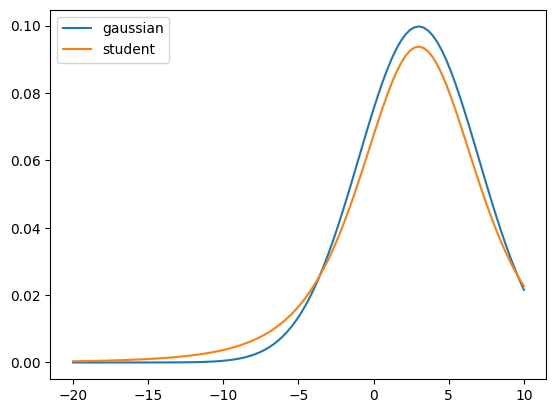

In [5]:
from scipy.stats import t

dist = norm(3,4)
st_dist = t(4, 3,4)
plt.plot(l, dist.pdf(l), label='gaussian')
plt.plot(l, st_dist.pdf(l), label='student')
plt.legend()
plt.show()

9.154561338118935


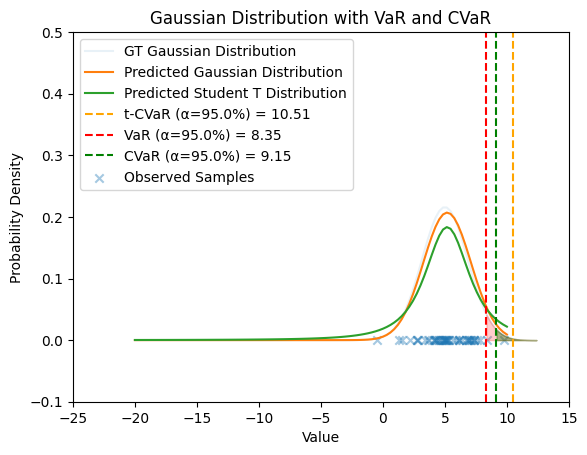

In [7]:

# plot GT distribution
# l = np.linspace(-20, 10, 100)
plt.plot(l, norm.pdf(l, mu, sigma), label='GT Gaussian Distribution', alpha=0.1)

# plot samples
# num_samples = 20
# samples = norm.rvs(mu, sigma, size=num_samples)
plt.scatter(samples,[0 for _ in range(num_samples)], marker='x', alpha=0.4, label='Observed Samples')

# plot pred distribution
# mu_hat, sigma_hat = norm.fit(samples)
# l = np.linspace(-20, 10, 100)
plt.plot(l, norm.pdf(l, mu_hat, sigma_hat), label='Predicted Gaussian Distribution')

nu = 2
t_dist = t(nu, mu_hat, sigma_hat)
plt.plot(l, t_dist.pdf(l), label='Predicted Student T Distribution')




# Parameters
alpha = 0.95  # confidence level

mu_0, lambda_, alpha_, beta = 4.9861503, 0.00249414, 2.2392793, 0.01782594

# mu_0, lambda_, alpha_, beta = 5.360287, 0.00531272, 2.5055106, 0.03187551

mu_0, lambda_, alpha_, beta = 4.933399, 0.0080884, 1.949606, 0.05384284

mu_0, lambda_, alpha_, beta = 4.9378877, 0.00331707, 2.254681, 0.02542868
t_CVaR = mu_hat + sigma_hat * ((nu + t.ppf(alpha, nu)**2) / ((nu-1)*(1-alpha))) * t.pdf(t.ppf(alpha, nu), nu)
sigma = ((beta * (1+lambda_))/(lambda_*alpha_))**(1/2) ##sqrt 해야하나?
nu = 2*alpha_
t_CVaR = mu_0 + sigma * ((nu + t.ppf(alpha, nu)**2) / ((nu-1)*(1-alpha))) * t.pdf(t.ppf(alpha, nu), nu)
plt.axvline(x=t_CVaR, color='orange', linestyle='--', label=f't-CVaR (α={alpha*100}%) = {t_CVaR:.2f}')
print(CVaR)
plt.fill_between(x, 0, y, where=(x >= CVaR), color='g', alpha=0.2)

# sample_CVaR = mu_hat + sigma_hat * (t.pdf(t.ppf(alpha, nu), nu)) / (1-alpha)
# plt.axvline(x=sample_CVaR, color='orange', linestyle='--', label=f'sample-CVaR (α={alpha*100}%) = {sample_CVaR:.2f}')
# plt.fill_between(x, 0, y, where=(x >= CVaR), color='g', alpha=0.2)

# VaR calculation
z_alpha = stats.norm.ppf(alpha)
VaR = mu_hat + sigma_hat * z_alpha

# CVaR calculation
pdf_z_alpha = stats.norm.pdf(z_alpha)
CVaR = mu_hat + (sigma_hat * pdf_z_alpha) / (1 - alpha)

# Plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.axvline(x=VaR, color='r', linestyle='--', label=f'VaR (α={alpha*100}%) = {VaR:.2f}')
plt.axvline(x=CVaR, color='g', linestyle='--', label=f'CVaR (α={alpha*100}%) = {CVaR:.2f}')
plt.fill_between(x, 0, y, where=(x >= VaR), color='r', alpha=0.2)
plt.fill_between(x, 0, y, where=(x >= CVaR), color='g', alpha=0.2)
plt.title('Gaussian Distribution with VaR and CVaR')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.xlim(-25,15)
plt.ylim(-0.1,0.5)
plt.legend()
plt.show()